In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
# Global random state vaulue
RANDOM_STATE = 42

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Finch-Health/data/training_data.csv")

In [ ]:
data.head()

,username,labels,comments
0,LoveAGoodTwist,veterinarian,"Female, Kentucky. 4 years out. Work equine on..."
1,drawntage,veterinarian,"Hi, LVT here. Are they nitpicking or are they ..."
2,Most-Exit-5507,veterinarian,In high school I found a youtube channel calle...
3,wahznooski,veterinarian,"As a woman of reproductive age, fuck Texas|As ..."
4,Churro_The_fish_Girl,veterinarian,what makes you want to become a vet?|what make...


In [ ]:
# focusing on the relevant columns
rel_data = data[["comments", "labels"]]

In [ ]:
rel_data.head()

,comments,labels
0,"Female, Kentucky. 4 years out. Work equine on...",veterinarian
1,"Hi, LVT here. Are they nitpicking or are they ...",veterinarian
2,In high school I found a youtube channel calle...,veterinarian
3,"As a woman of reproductive age, fuck Texas|As ...",veterinarian
4,what makes you want to become a vet?|what make...,veterinarian


In [ ]:
# Check for null cells
rel_data.isnull().values.any()

False

In [ ]:
# check for duplicated content.
rel_data.duplicated().values.any()

True

In [ ]:
rel_data.duplicated().sum()

1

In [ ]:
# drop one of the duplicated rows
rel_data.drop_duplicates(keep='last', inplace=True)

<ipython-input-11-fbf02923298e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rel_data.drop_duplicates(keep='last', inplace=True)


<Axes: xlabel='labels'>

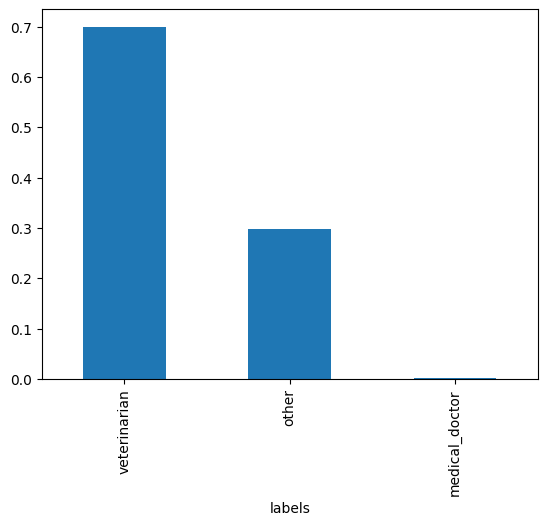

In [ ]:
# visualise the labels ratio in the dataset.
rel_data['labels'].value_counts(normalize = True).plot.bar()

In [ ]:
x_data = rel_data["comments"].to_list()
y_data = rel_data["labels"].to_list()

In [ ]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=RANDOM_STATE, stratify=y_data)

### Pre-process Text Data

In [ ]:
import re
import nltk
import string
from nltk.corpus import stopwords
from imblearn.pipeline import Pipeline
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RepeatedStratifiedKFold

In [ ]:
nltk.download("punkt")
nltk.download("stopwords")
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
stop_words = set(stopwords.words("english"))
wordnet_lemmatizer = WordNetLemmatizer()

In [ ]:
# preprocess text data
def preprocess_text(text):
    tokens = word_tokenize(text) # tokenize words.
    filtered_tokens = [token.lower() for token in tokens if token.lower() not in stop_words] # remove stopwords.
    lemmed_tokens = [wordnet_lemmatizer.lemmatize(token) for token in filtered_tokens] # lemmatize tokens.
    text =  " ".join(lemmed_tokens)
    text = re.sub(r'[^\w\s]', '', text) # remove punctuations.
    text = re.sub(r'\d', '', text) # remove numbers.
    return text

In [ ]:
data = {'comments': X_train,
        'labels': y_train}

# Convert the dictionary into DataFrame
training_data = pd.DataFrame(data)

In [ ]:
data_test = {'comments': X_test,
        'labels': y_test}

# Convert the dictionary into DataFrame
test_data = pd.DataFrame(data_test)

In [ ]:
training_data.head()

,comments,labels
0,>< Bad timing lol ---> /r/MysteriumNetwork/com...,other
1,Not wrong. Left there they cause pain as they ...,veterinarian
2,Dont put your computer to sleep.|Dont put your...,other
3,"on what device you had this on? on some, like ...",other
4,"Wishing you all the best, for sure your intuit...",veterinarian


In [ ]:
test_data.head()

,comments,labels
0,Nice! If anyone is hosting a Mysterium node an...,other
1,What do YOU want in a practice? Most new grads...,veterinarian
2,Damn I’ve been a vet tech for 3 years and I ju...,veterinarian
3,One of my mentors told me it would be the best...,veterinarian
4,Hello! When my workplace hired a new grad doct...,veterinarian


In [ ]:
minority_class_len = len(training_data[training_data["labels"] == 'medical_doctor'])
minority_class_len

6

In [ ]:
# Manually downsampling the majority classes to 60 samples.
majority_class_len = 60

In [ ]:
other_x = training_data[training_data["labels"] == 'other'].sample(n=majority_class_len, random_state=RANDOM_STATE)
medical_x = training_data[training_data["labels"] == 'medical_doctor'].sample(n=minority_class_len, random_state=RANDOM_STATE)
veterinaian_x = training_data[training_data["labels"] == 'veterinarian'].sample(n=majority_class_len, random_state=RANDOM_STATE)

In [ ]:
final_data = pd.concat([other_x, medical_x, veterinaian_x], ignore_index=True, axis=0)

In [ ]:
final_data.head()

,comments,labels
0,When will you release the payment system? |In ...,other
1,The point is that the risk is not worth the re...,other
2,This could be due to port restriction/ cone re...,other
3,Is there any other projects where I can sell b...,other
4,Yeah I did sudo apt get full-upgrade ---> /r/M...,other


In [ ]:
# pre-process text data.
final_data["clean_comments"] = final_data["comments"].apply(lambda x: preprocess_text(x))

In [ ]:
final_data.head()

,comments,labels,clean_comments
0,When will you release the payment system? |In ...,other,release payment system in term security safe ...
1,The point is that the risk is not worth the re...,other,point risk worth reward re viewing solely alt...
2,This could be due to port restriction/ cone re...,other,could due port restriction cone restriction n...
3,Is there any other projects where I can sell b...,other,project sell bandwidth rmysteriumnetworkco...
4,Yeah I did sudo apt get full-upgrade ---> /r/M...,other,yeah sudo apt get fullupgrade rmysteriumnet...


### Model Training.

In [ ]:
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
vectorizer = TfidfVectorizer() #analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000
oversample = SMOTE()
classifier = MultinomialNB()

In [ ]:
y_labels = final_data["labels"].to_list()
x_feats = final_data["clean_comments"].to_list()

In [ ]:
vectorizer.fit(x_feats)

TfidfVectorizer()

In [ ]:
x_feats_vectorized = vectorizer.transform(x_feats)

In [ ]:
X_t, y_t = oversample.fit_resample(x_feats_vectorized, y_labels)

In [ ]:
classifier.fit(X_t, y_t)

MultinomialNB()

### Text Classification

In [ ]:
minority_class_test_len = len(test_data[test_data["labels"] == 'medical_doctor'])
minority_class_test_len

2

In [ ]:
majority_class_test_len = 10

In [ ]:
other_x_test = test_data[test_data["labels"] == 'other'].sample(n=majority_class_test_len, random_state=RANDOM_STATE)
medical_x_test = test_data[test_data["labels"] == 'medical_doctor'].sample(n=minority_class_test_len, random_state=RANDOM_STATE)
veterinaian_x_test = test_data[test_data["labels"] == 'veterinarian'].sample(n=majority_class_test_len, random_state=RANDOM_STATE)

In [ ]:
final_data_test = pd.concat([other_x_test, medical_x_test, veterinaian_x_test], ignore_index=True, axis=0)

In [ ]:
final_data_test["clean_comments"] = final_data_test["comments"].apply(lambda x: preprocess_text(x))

In [ ]:
x_test = final_data_test["clean_comments"].to_list()
y_test = final_data_test["labels"].to_list()

In [ ]:
x_test_vec = vectorizer.transform(x_test)

In [ ]:
y_pred = classifier.predict(x_test_vec)

In [ ]:
print(classification_report(y_test, y_pred))

                precision    recall  f1-score   support

medical_doctor       0.67      1.00      0.80         2
         other       1.00      0.90      0.95        10
  veterinarian       1.00      1.00      1.00        10

      accuracy                           0.95        22
     macro avg       0.89      0.97      0.92        22
  weighted avg       0.97      0.95      0.96        22



### Hyper-parameter fine tuninig.

### Fine-tunning Model 1: Base Model (MultinomialNB)

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=RANDOM_STATE)

In [ ]:
mnb_classifier = MultinomialNB()

In [ ]:
scores = cross_val_score(mnb_classifier, X_t, y_t, scoring='f1_weighted', cv=cv, n_jobs=-1)

In [ ]:
scores

array([0.91636364, 0.85939394, 0.9430303 , 0.97217391, 0.94439614,
       0.97217391, 0.91638796, 0.9430303 , 0.94405594, 0.8562963 ,
       0.88205128, 0.88673993, 0.97217391, 0.91652174, 0.91636364])

In [ ]:
np.mean(scores)

0.9227435227145372

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
def hyper_parameter_tuning(model, x, y, param_grid, grid=True, scoring='f1_weighted'):
  #Setting the range for class weights
  weights = np.linspace(0.0,0.99,6) #(0.0,0.99,200)
  cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=RANDOM_STATE)

  print(param_grid)

  if grid:
    #Fitting grid search to the train data
    param_search = GridSearchCV(estimator= model,
                              param_grid= param_grid,
                              cv=cv,
                              n_jobs=-1,
                              scoring= scoring,
                              verbose=2).fit(x, y)
  else:
    #Fitting random search to the train data
    param_search = RandomizedSearchCV(estimator= model,
                              param_distributions= param_grid,
                              cv=cv,
                              n_jobs=-1,
                              scoring=scoring,
                              verbose=2).fit(x, y)

  if grid:
    print(" Results from Grid Search ")
  else:
    print(" Results from Random Search " )

  optimized_estimator = param_search.best_estimator_
  print("\n The best estimator across ALL searched params:\n", optimized_estimator)
  print("\n The best score across ALL searched params:\n",param_search.best_score_)
  print("\n The best parameters across ALL searched params:\n",param_search.best_params_)

  return optimized_estimator

In [ ]:
# help(temp_classifier)

In [ ]:
mnb_param_grid = {
              'alpha': [1,10,100]}

In [ ]:
# using grid search
grid_search_mnb_model = hyper_parameter_tuning(mnb_classifier, X_t, y_t, mnb_param_grid, grid=True)

{'alpha': [1, 10, 100]}
Fitting 15 folds for each of 3 candidates, totalling 45 fits
 Results from Grid Search 

 The best estimator across ALL searched params:
 MultinomialNB(alpha=1)

 The best score across ALL searched params:
 0.9227435227145372

 The best parameters across ALL searched params:
 {'alpha': 1}


In [ ]:
# using random search
random_search_model = hyper_parameter_tuning(mnb_classifier, X_t, y_t, mnb_param_grid, grid=False)

{'alpha': [1, 10, 100]}
Fitting 15 folds for each of 3 candidates, totalling 45 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


 Results from Random Search 

 The best estimator across ALL searched params:
 MultinomialNB(alpha=1)

 The best score across ALL searched params:
 0.9227435227145372

 The best parameters across ALL searched params:
 {'alpha': 1}


### Fine-tunning Model 2: Random Forest Model.

In [ ]:
rf_param_grid = {
              'n_estimators': [10,100,500],
              'criterion': ['gini','entropy','log_loss'],
              'max_depth':[3,6,9],
              'min_samples_split':[2,3],
              'max_features':['sqrt','log2']}

In [ ]:
rf_classifier = RandomForestClassifier(random_state=RANDOM_STATE)

In [ ]:
scores = cross_val_score(rf_classifier, X_t, y_t, scoring='f1_weighted', cv=cv, n_jobs=-1)

In [ ]:
scores

array([0.83216783, 0.85890653, 0.91652174, 0.82222222, 0.88571429,
       0.91534392, 0.88811189, 0.82222222, 0.91652174, 0.85480944,
       0.88571429, 0.77142857, 0.82222222, 0.94405594, 0.88888889])

In [ ]:
np.mean(scores)

0.868323447954194

In [ ]:
grid_search_rf_model = hyper_parameter_tuning(rf_classifier, X_t, y_t, rf_param_grid, grid=True)

{'n_estimators': [10, 100, 500], 'criterion': ['gini', 'entropy', 'log_loss'], 'max_depth': [3, 6, 9], 'min_samples_split': [2, 3], 'max_features': ['sqrt', 'log2']}
Fitting 15 folds for each of 108 candidates, totalling 1620 fits
 Results from Grid Search 

 The best estimator across ALL searched params:
 RandomForestClassifier(max_depth=6, min_samples_split=3, random_state=42)

 The best score across ALL searched params:
 0.8564688262655101

 The best parameters across ALL searched params:
 {'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_split': 3, 'n_estimators': 100}


In [ ]:
random_search_rf_model = hyper_parameter_tuning(rf_classifier, X_t, y_t, rf_param_grid, grid=False)

{'n_estimators': [10, 100, 500], 'criterion': ['gini', 'entropy', 'log_loss'], 'max_depth': [3, 6, 9], 'min_samples_split': [2, 3], 'max_features': ['sqrt', 'log2']}
Fitting 15 folds for each of 10 candidates, totalling 150 fits
 Results from Random Search 

 The best estimator across ALL searched params:
 RandomForestClassifier(criterion='entropy', max_depth=9, min_samples_split=3,
                       random_state=42)

 The best score across ALL searched params:
 0.8553931354473256

 The best parameters across ALL searched params:
 {'n_estimators': 100, 'min_samples_split': 3, 'max_features': 'sqrt', 'max_depth': 9, 'criterion': 'entropy'}


### Fine-tunning Model 3: Decision Tree

In [ ]:
dt_param_grid = {
              'criterion': ['gini','entropy','log_loss'],
              'max_depth':[3,6],
              'min_samples_split':[2,3],
              'max_features':['sqrt','log2']}

In [ ]:
dt_classifier = DecisionTreeClassifier(random_state=RANDOM_STATE)

In [ ]:
scores = cross_val_score(dt_classifier, X_t, y_t, scoring='f1_weighted', cv=cv, n_jobs=-1)

In [ ]:
scores

array([0.77146042, 0.80246914, 0.91340659, 0.71296296, 0.85793651,
       0.80521739, 0.88888889, 0.74473118, 0.80439005, 0.77601954,
       0.77381134, 0.6762963 , 0.73353383, 0.76842912, 0.83216783])

In [ ]:
np.mean(scores)

0.7907814065940001

In [ ]:
grid_search_dt_model = hyper_parameter_tuning(dt_classifier, X_t, y_t, dt_param_grid, grid=True)

{'criterion': ['gini', 'entropy', 'log_loss'], 'max_depth': [3, 6], 'min_samples_split': [2, 3], 'max_features': ['sqrt', 'log2']}
Fitting 15 folds for each of 24 candidates, totalling 360 fits
 Results from Grid Search 

 The best estimator across ALL searched params:
 DecisionTreeClassifier(criterion='entropy', max_depth=6, max_features='sqrt',
                       random_state=42)

 The best score across ALL searched params:
 0.525092784350409

 The best parameters across ALL searched params:
 {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_split': 2}


In [ ]:
random_search_dt_model = hyper_parameter_tuning(dt_classifier, X_t, y_t, dt_param_grid, grid=False)

{'criterion': ['gini', 'entropy', 'log_loss'], 'max_depth': [3, 6], 'min_samples_split': [2, 3], 'max_features': ['sqrt', 'log2']}
Fitting 15 folds for each of 10 candidates, totalling 150 fits
 Results from Random Search 

 The best estimator across ALL searched params:
 DecisionTreeClassifier(criterion='log_loss', max_depth=6, max_features='sqrt',
                       random_state=42)

 The best score across ALL searched params:
 0.525092784350409

 The best parameters across ALL searched params:
 {'min_samples_split': 2, 'max_features': 'sqrt', 'max_depth': 6, 'criterion': 'log_loss'}


Fine-tunning Model 4: SVM

In [ ]:
# help(SVC)

In [ ]:
svm_param_grid = {
              'C': [1,10,100],
              'kernel': ['poly', 'rbf', 'sigmoid'],
              'gamma':['scale', 'auto'],
              'coef0':[1,1.5]
              }

In [ ]:
svm_classifier = SVC(random_state=RANDOM_STATE)

In [ ]:
scores = cross_val_score(svm_classifier, X_t, y_t, scoring='f1_weighted', cv=cv, n_jobs=-1)

In [ ]:
scores

array([0.85890653, 0.85480944, 0.97217391, 0.85480944, 0.97217391,
       0.97217391, 0.94405594, 0.66386555, 0.83216783, 0.91534392,
       0.91534392, 0.91534392, 0.88571429, 0.94405594, 0.88811189])

In [ ]:
np.mean(scores)

0.892603355055526

In [ ]:
grid_search_svm_model = hyper_parameter_tuning(svm_classifier, X_t, y_t, svm_param_grid, grid=True)

{'C': [1, 10, 100], 'kernel': ['poly', 'rbf', 'sigmoid'], 'gamma': ['scale', 'auto'], 'coef0': [1, 1.5]}
Fitting 15 folds for each of 36 candidates, totalling 540 fits
 Results from Grid Search 

 The best estimator across ALL searched params:
 SVC(C=1, coef0=1.5, kernel='poly', random_state=42)

 The best score across ALL searched params:
 0.9189559118641244

 The best parameters across ALL searched params:
 {'C': 1, 'coef0': 1.5, 'gamma': 'scale', 'kernel': 'poly'}


In [ ]:
random_search_svm_model = hyper_parameter_tuning(svm_classifier, X_t, y_t, svm_param_grid, grid=False)

{'C': [1, 10, 100], 'kernel': ['poly', 'rbf', 'sigmoid'], 'gamma': ['scale', 'auto'], 'coef0': [1, 1.5]}
Fitting 15 folds for each of 10 candidates, totalling 150 fits
 Results from Random Search 

 The best estimator across ALL searched params:
 SVC(C=10, coef0=1.5, random_state=42)

 The best score across ALL searched params:
 0.9168502298143092

 The best parameters across ALL searched params:
 {'kernel': 'rbf', 'gamma': 'scale', 'coef0': 1.5, 'C': 10}


### Comparing best performing model and second best.

In [ ]:
best_performing_model = classifier

In [ ]:
second_best_peforming_model = grid_search_svm_model

In [ ]:
y_pred_one = best_performing_model.predict(x_test_vec)
print(classification_report(y_test, y_pred_one))

                precision    recall  f1-score   support

medical_doctor       0.67      1.00      0.80         2
         other       1.00      0.90      0.95        10
  veterinarian       1.00      1.00      1.00        10

      accuracy                           0.95        22
     macro avg       0.89      0.97      0.92        22
  weighted avg       0.97      0.95      0.96        22



In [ ]:
y_pred_two = second_best_peforming_model.predict(x_test_vec)
print(classification_report(y_test, y_pred_two))

                precision    recall  f1-score   support

medical_doctor       1.00      0.50      0.67         2
         other       0.91      1.00      0.95        10
  veterinarian       1.00      1.00      1.00        10

      accuracy                           0.95        22
     macro avg       0.97      0.83      0.87        22
  weighted avg       0.96      0.95      0.95        22



### Although the both models have good accuracy, The best performing model is selected due to having a better f1 score accross the three labels, this is important because of the imbalance in the dataset.

### Saving Best performing model and vectorizer

In [ ]:
best_model = best_performing_model
best_model_path = "/content/drive/MyDrive/Finch-Health/model/best_classfier.pkl"

In [ ]:
import pickle

In [ ]:
with open(best_model_path,"wb") as file:
  pickle.dump(best_model, file)

In [ ]:
vectorizer_model_path = "/content/drive/MyDrive/Finch-Health/model/vectorizer.pkl"

In [ ]:
with open(vectorizer_model_path,"wb") as file:
  pickle.dump(vectorizer, file)